In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()  # To see data types and missing values
data.describe()  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop(columns=['Cabin', 'Ticket'], inplace=True)
data.dropna(inplace=True)  # Drop rows with missing data


In [5]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)


In [6]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(y_pred_logreg)


[0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1]


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(y_pred_rf)


[0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0
 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1]


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7921348314606742
Confusion Matrix:
 [[88 21]
 [16 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



In [15]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7921348314606742
Confusion Matrix:
 [[89 20]
 [17 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       109
           1       0.72      0.75      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178



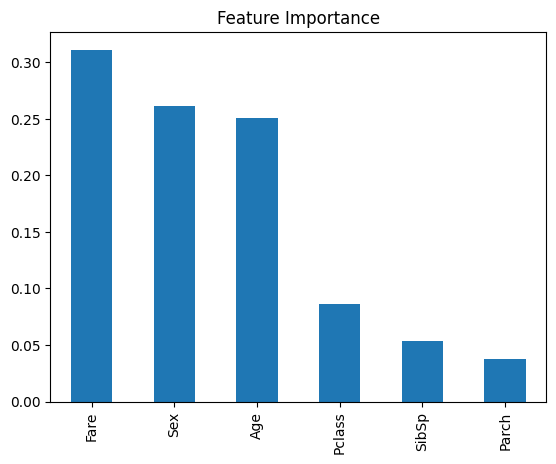

In [17]:
import matplotlib.pyplot as plt
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()
